x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 24s 403us/step - loss: 1.1655 - acc: 0.8659 - val_loss: 0.1561 - val_acc: 0.9540
Epoch 2/12
60000/60000 [==============================] - 23s 387us/step - loss: 0.1098 - acc: 0.9680 - val_loss: 0.1585 - val_acc: 0.9517
Epoch 3/12
60000/60000 [==============================] - 23s 384us/step - loss: 0.0652 - acc: 0.9796 - val_loss: 0.0658 - val_acc: 0.9811
Epoch 4/12
60000/60000 [==============================] - 24s 394us/step - loss: 0.0455 - acc: 0.9863 - val_loss: 0.0667 - val_acc: 0.9792
Epoch 5/12
60000/60000 [==============================] - 23s 391us/step - loss: 0.0337 - acc: 0.9894 - val_loss: 0.0558 - val_acc: 0.9838
Epoch 6/12
60000/60000 [==============================] - 23s 390us/step - loss: 0.0252 - acc: 0.9920 - val_loss: 0.0634 - val_acc: 0.9840
Epoch 7/12
60000/60000 [===================

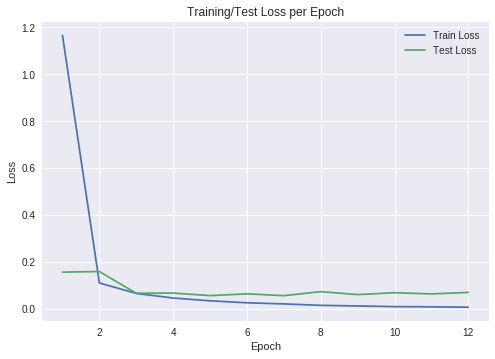

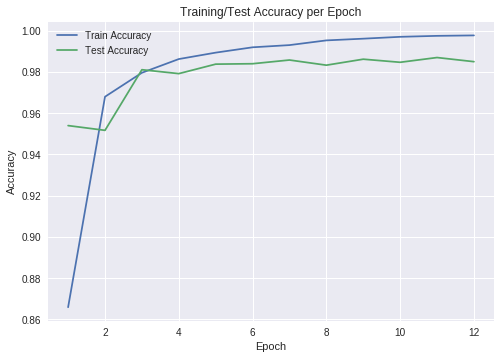

In [17]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tensorflow.examples.tutorials.mnist import input_data
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras import optimizers
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# x_train /= 255
# x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = keras.Sequential()

model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D())

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(units=120, activation='relu'))

model.add(Dense(units=84, activation='relu'))

model.add(Dense(units=10, activation = 'softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
scores = model.evaluate(x_test, y_test, verbose=0)


print('LeNet 5 Training Error: %.4f%%' % (100-history.history['acc'][epochs-1]*100))
print('LeNet 5 Training Loss: %.4f%%' % (history.history['loss'][epochs-1]*100))
print('LeNet 5 Training Accuracy: %.4f%%' % (history.history['acc'][epochs-1]*100))

print('LeNet 5 Test Error: %.4f%%' % (100-scores[1]*100))
print('LeNet 5 Test Loss: %.4f%%' % (scores[0]*100))
print('LeNet 5 Test Accuracy: %.4f%%' % (scores[1]*100))


def PlotHistory(train_value, test_value, value_is_loss_or_acc):
    f, ax = plt.subplots()
    ax.plot([None] + train_value)
    ax.plot([None] + test_value)
    ax.legend(['Train ' + value_is_loss_or_acc, 'Test ' + value_is_loss_or_acc], loc = 'best') 
    ax.set_title('Training/Test ' + value_is_loss_or_acc + ' per Epoch')
    ax.set_xlabel('Epoch')
    ax.set_ylabel(value_is_loss_or_acc)  
    
PlotHistory(history.history['loss'], history.history['val_loss'], 'Loss')
PlotHistory(history.history['acc'], history.history['val_acc'], 'Accuracy')

Changing epochs to 16
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/16
60000/60000 [==============================] - 25s 416us/step - loss: 2.2156 - acc: 0.8058 - val_loss: 0.1366 - val_acc: 0.9602
Epoch 2/16
60000/60000 [==============================] - 24s 396us/step - loss: 0.1140 - acc: 0.9661 - val_loss: 0.0932 - val_acc: 0.9711
Epoch 3/16
60000/60000 [==============================] - 24s 395us/step - loss: 0.0681 - acc: 0.9797 - val_loss: 0.0761 - val_acc: 0.9767
Epoch 4/16
60000/60000 [==============================] - 24s 394us/step - loss: 0.0473 - acc: 0.9853 - val_loss: 0.0654 - val_acc: 0.9800
Epoch 5/16
60000/60000 [==============================] - 24s 404us/step - loss: 0.0355 - acc: 0.9886 - val_loss: 0.0624 - val_acc: 0.9818
Epoch 6/16
60000/60000 [==============================] - 24s 394us/step - loss: 0.0263 - acc: 0.9916 - val_loss: 0.0731 - val_acc: 0.9805
Epoch 7/16
60000/6000

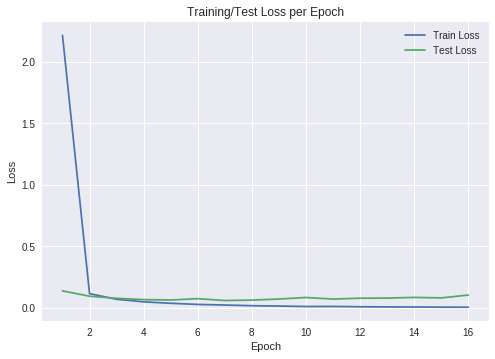

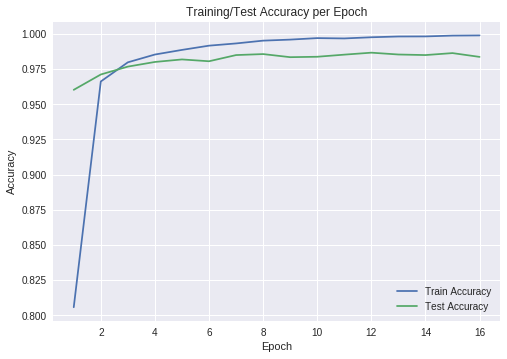

In [18]:
# Changing epochs to 16
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tensorflow.examples.tutorials.mnist import input_data
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras import optimizers
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 16

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# x_train /= 255
# x_test /= 255

print('Changing epochs to 16')

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = keras.Sequential()

model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D())

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(units=120, activation='relu'))

model.add(Dense(units=84, activation='relu'))

model.add(Dense(units=10, activation = 'softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
scores = model.evaluate(x_test, y_test, verbose=0)


print('LeNet 5 Training Error: %.4f%%' % (100-history.history['acc'][epochs-1]*100))
print('LeNet 5 Training Loss: %.4f%%' % (history.history['loss'][epochs-1]*100))
print('LeNet 5 Training Accuracy: %.4f%%' % (history.history['acc'][epochs-1]*100))

print('LeNet 5 Test Error: %.4f%%' % (100-scores[1]*100))
print('LeNet 5 Test Loss: %.4f%%' % (scores[0]*100))
print('LeNet 5 Test Accuracy: %.4f%%' % (scores[1]*100))


def PlotHistory(train_value, test_value, value_is_loss_or_acc):
    f, ax = plt.subplots()
    ax.plot([None] + train_value)
    ax.plot([None] + test_value)
    ax.legend(['Train ' + value_is_loss_or_acc, 'Test ' + value_is_loss_or_acc], loc = 'best') 
    ax.set_title('Training/Test ' + value_is_loss_or_acc + ' per Epoch')
    ax.set_xlabel('Epoch')
    ax.set_ylabel(value_is_loss_or_acc)  
    
PlotHistory(history.history['loss'], history.history['val_loss'], 'Loss')
PlotHistory(history.history['acc'], history.history['val_acc'], 'Accuracy')

Changing activation to sigmoid
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 25s 416us/step - loss: 1.5740 - acc: 0.4874 - val_loss: 0.5230 - val_acc: 0.8752
Epoch 2/12
60000/60000 [==============================] - 23s 389us/step - loss: 0.3190 - acc: 0.9157 - val_loss: 0.1982 - val_acc: 0.9417
Epoch 3/12
60000/60000 [==============================] - 23s 385us/step - loss: 0.1732 - acc: 0.9488 - val_loss: 0.1333 - val_acc: 0.9605
Epoch 4/12
60000/60000 [==============================] - 23s 387us/step - loss: 0.1314 - acc: 0.9603 - val_loss: 0.1183 - val_acc: 0.9645
Epoch 5/12
60000/60000 [==============================] - 23s 389us/step - loss: 0.1103 - acc: 0.9669 - val_loss: 0.0927 - val_acc: 0.9720
Epoch 6/12
60000/60000 [==============================] - 23s 389us/step - loss: 0.0967 - acc: 0.9703 - val_loss: 0.0871 - val_acc: 0.9727
Epoch 7/12
6

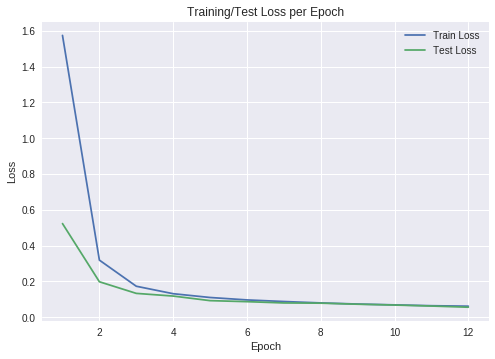

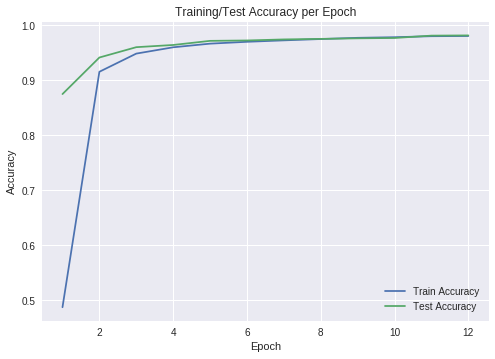

In [23]:
# Changing activation to sigmoid
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tensorflow.examples.tutorials.mnist import input_data
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras import optimizers
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# x_train /= 255
# x_test /= 255

print('Changing activation to sigmoid')

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = keras.Sequential()

model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='sigmoid', input_shape=(28,28,1)))
model.add(MaxPooling2D())

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='sigmoid'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(units=120, activation='sigmoid'))

model.add(Dense(units=84, activation='sigmoid'))

model.add(Dense(units=10, activation = 'softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
scores = model.evaluate(x_test, y_test, verbose=0)


print('LeNet 5 Training Error: %.4f%%' % (100-history.history['acc'][epochs-1]*100))
print('LeNet 5 Training Loss: %.4f%%' % (history.history['loss'][epochs-1]*100))
print('LeNet 5 Training Accuracy: %.4f%%' % (history.history['acc'][epochs-1]*100))

print('LeNet 5 Test Error: %.4f%%' % (100-scores[1]*100))
print('LeNet 5 Test Loss: %.4f%%' % (scores[0]*100))
print('LeNet 5 Test Accuracy: %.4f%%' % (scores[1]*100))


def PlotHistory(train_value, test_value, value_is_loss_or_acc):
    f, ax = plt.subplots()
    ax.plot([None] + train_value)
    ax.plot([None] + test_value)
    ax.legend(['Train ' + value_is_loss_or_acc, 'Test ' + value_is_loss_or_acc], loc = 'best') 
    ax.set_title('Training/Test ' + value_is_loss_or_acc + ' per Epoch')
    ax.set_xlabel('Epoch')
    ax.set_ylabel(value_is_loss_or_acc)  
    
PlotHistory(history.history['loss'], history.history['val_loss'], 'Loss')
PlotHistory(history.history['acc'], history.history['val_acc'], 'Accuracy')

Changing pooling to Average Pooling
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 24s 402us/step - loss: 0.6739 - acc: 0.9031 - val_loss: 0.0880 - val_acc: 0.9736
Epoch 2/12
60000/60000 [==============================] - 23s 375us/step - loss: 0.0862 - acc: 0.9741 - val_loss: 0.0618 - val_acc: 0.9795
Epoch 3/12
60000/60000 [==============================] - 23s 390us/step - loss: 0.0546 - acc: 0.9831 - val_loss: 0.0429 - val_acc: 0.9856
Epoch 4/12
60000/60000 [==============================] - 23s 377us/step - loss: 0.0402 - acc: 0.9878 - val_loss: 0.0432 - val_acc: 0.9865
Epoch 5/12
60000/60000 [==============================] - 23s 376us/step - loss: 0.0318 - acc: 0.9903 - val_loss: 0.0456 - val_acc: 0.9855
Epoch 6/12
60000/60000 [==============================] - 23s 376us/step - loss: 0.0248 - acc: 0.9922 - val_loss: 0.0561 - val_acc: 0.9840
Epoch 7

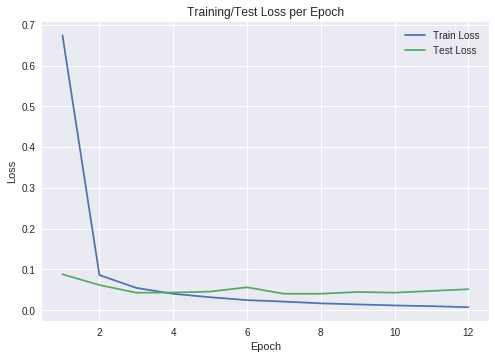

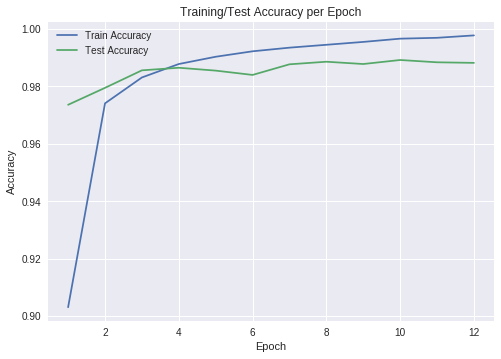

In [20]:
# Changing pooling to Average Pooling
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tensorflow.examples.tutorials.mnist import input_data
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras import optimizers
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# x_train /= 255
# x_test /= 255

print('Changing pooling to Average Pooling')

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = keras.Sequential()

model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(AveragePooling2D())

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())

model.add(Flatten())

model.add(Dense(units=120, activation='relu'))

model.add(Dense(units=84, activation='relu'))

model.add(Dense(units=10, activation = 'softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
scores = model.evaluate(x_test, y_test, verbose=0)


print('LeNet 5 Training Error: %.4f%%' % (100-history.history['acc'][epochs-1]*100))
print('LeNet 5 Training Loss: %.4f%%' % (history.history['loss'][epochs-1]*100))
print('LeNet 5 Training Accuracy: %.4f%%' % (history.history['acc'][epochs-1]*100))

print('LeNet 5 Test Error: %.4f%%' % (100-scores[1]*100))
print('LeNet 5 Test Loss: %.4f%%' % (scores[0]*100))
print('LeNet 5 Test Accuracy: %.4f%%' % (scores[1]*100))


def PlotHistory(train_value, test_value, value_is_loss_or_acc):
    f, ax = plt.subplots()
    ax.plot([None] + train_value)
    ax.plot([None] + test_value)
    ax.legend(['Train ' + value_is_loss_or_acc, 'Test ' + value_is_loss_or_acc], loc = 'best') 
    ax.set_title('Training/Test ' + value_is_loss_or_acc + ' per Epoch')
    ax.set_xlabel('Epoch')
    ax.set_ylabel(value_is_loss_or_acc)  
    
PlotHistory(history.history['loss'], history.history['val_loss'], 'Loss')
PlotHistory(history.history['acc'], history.history['val_acc'], 'Accuracy')

Changing optimizer to SGD with default learning rate 0.01
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 25s 410us/step - loss: 0.6506 - acc: 0.8821 - val_loss: 0.1505 - val_acc: 0.9548
Epoch 2/12
60000/60000 [==============================] - 23s 386us/step - loss: 0.1279 - acc: 0.9606 - val_loss: 0.1012 - val_acc: 0.9684
Epoch 3/12
60000/60000 [==============================] - 23s 385us/step - loss: 0.0918 - acc: 0.9723 - val_loss: 0.0854 - val_acc: 0.9749
Epoch 4/12
60000/60000 [==============================] - 23s 382us/step - loss: 0.0755 - acc: 0.9761 - val_loss: 0.0809 - val_acc: 0.9758
Epoch 5/12
60000/60000 [==============================] - 24s 395us/step - loss: 0.0637 - acc: 0.9800 - val_loss: 0.0699 - val_acc: 0.9775
Epoch 6/12
60000/60000 [==============================] - 23s 382us/step - loss: 0.0546 - acc: 0.9829 - val_loss: 0.0709 - v

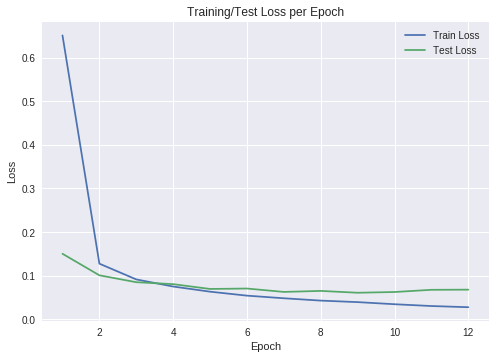

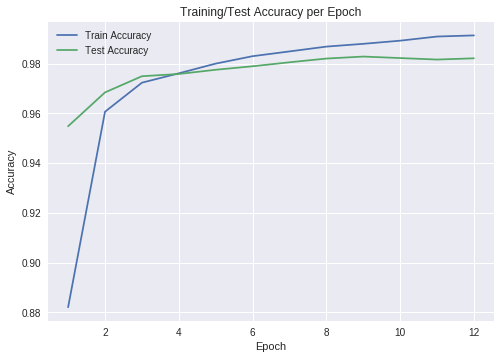

In [21]:
# Changing optimizer to SGD with default learning rate 0.01
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tensorflow.examples.tutorials.mnist import input_data
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras import optimizers
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# x_train /= 255
# x_test /= 255

print('Changing optimizer to SGD with default learning rate 0.01')

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = keras.Sequential()

model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D())

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(units=120, activation='relu'))

model.add(Dense(units=84, activation='relu'))

model.add(Dense(units=10, activation = 'softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
scores = model.evaluate(x_test, y_test, verbose=0)


print('LeNet 5 Training Error: %.4f%%' % (100-history.history['acc'][epochs-1]*100))
print('LeNet 5 Training Loss: %.4f%%' % (history.history['loss'][epochs-1]*100))
print('LeNet 5 Training Accuracy: %.4f%%' % (history.history['acc'][epochs-1]*100))

print('LeNet 5 Test Error: %.4f%%' % (100-scores[1]*100))
print('LeNet 5 Test Loss: %.4f%%' % (scores[0]*100))
print('LeNet 5 Test Accuracy: %.4f%%' % (scores[1]*100))


def PlotHistory(train_value, test_value, value_is_loss_or_acc):
    f, ax = plt.subplots()
    ax.plot([None] + train_value)
    ax.plot([None] + test_value)
    ax.legend(['Train ' + value_is_loss_or_acc, 'Test ' + value_is_loss_or_acc], loc = 'best') 
    ax.set_title('Training/Test ' + value_is_loss_or_acc + ' per Epoch')
    ax.set_xlabel('Epoch')
    ax.set_ylabel(value_is_loss_or_acc)  
    
PlotHistory(history.history['loss'], history.history['val_loss'], 'Loss')
PlotHistory(history.history['acc'], history.history['val_acc'], 'Accuracy')

Changing kernel size to 5x5
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 35s 587us/step - loss: 3.3188 - acc: 0.7428 - val_loss: 0.1893 - val_acc: 0.9478
Epoch 2/12
60000/60000 [==============================] - 34s 569us/step - loss: 0.1256 - acc: 0.9633 - val_loss: 0.0837 - val_acc: 0.9775
Epoch 3/12
60000/60000 [==============================] - 34s 575us/step - loss: 0.0767 - acc: 0.9768 - val_loss: 0.0746 - val_acc: 0.9785
Epoch 4/12
60000/60000 [==============================] - 35s 588us/step - loss: 0.0541 - acc: 0.9836 - val_loss: 0.0705 - val_acc: 0.9790
Epoch 5/12
60000/60000 [==============================] - 35s 582us/step - loss: 0.0409 - acc: 0.9877 - val_loss: 0.0598 - val_acc: 0.9820
Epoch 6/12
60000/60000 [==============================] - 35s 577us/step - loss: 0.0343 - acc: 0.9898 - val_loss: 0.0588 - val_acc: 0.9845
Epoch 7/12
6000

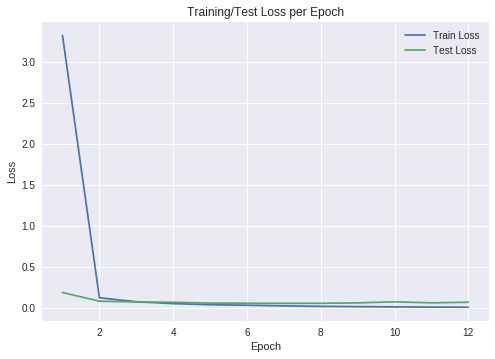

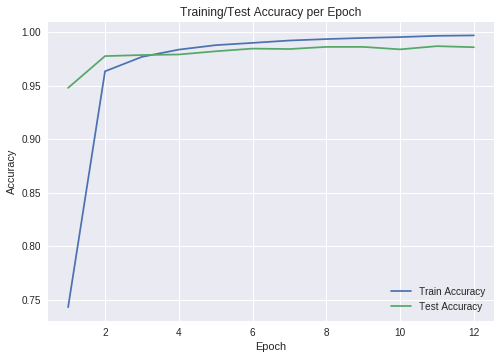

In [22]:
#Changing kernel size to 5x5
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tensorflow.examples.tutorials.mnist import input_data
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras import optimizers
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# x_train /= 255
# x_test /= 255

print('Changing kernel size to 5x5')

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = keras.Sequential()

model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D())

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(units=120, activation='relu'))

model.add(Dense(units=84, activation='relu'))

model.add(Dense(units=10, activation = 'softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
scores = model.evaluate(x_test, y_test, verbose=0)


print('LeNet 5 Training Error: %.4f%%' % (100-history.history['acc'][epochs-1]*100))
print('LeNet 5 Training Loss: %.4f%%' % (history.history['loss'][epochs-1]*100))
print('LeNet 5 Training Accuracy: %.4f%%' % (history.history['acc'][epochs-1]*100))

print('LeNet 5 Test Error: %.4f%%' % (100-scores[1]*100))
print('LeNet 5 Test Loss: %.4f%%' % (scores[0]*100))
print('LeNet 5 Test Accuracy: %.4f%%' % (scores[1]*100))


def PlotHistory(train_value, test_value, value_is_loss_or_acc):
    f, ax = plt.subplots()
    ax.plot([None] + train_value)
    ax.plot([None] + test_value)
    ax.legend(['Train ' + value_is_loss_or_acc, 'Test ' + value_is_loss_or_acc], loc = 'best') 
    ax.set_title('Training/Test ' + value_is_loss_or_acc + ' per Epoch')
    ax.set_xlabel('Epoch')
    ax.set_ylabel(value_is_loss_or_acc)  
    
PlotHistory(history.history['loss'], history.history['val_loss'], 'Loss')
PlotHistory(history.history['acc'], history.history['val_acc'], 'Accuracy')

In [0]:
train_acc=[99.7733, 99.8867, 98.0833, 99.7769, 99.13, 99.6833]

test_acc=[98.5, 98.36, 98.19, 98.82, 98.21, 98.58]

In [27]:
print(np.mean(train_acc))
print(np.var(train_acc))

99.38891666666667
0.4007340213888933


In [28]:
print(np.mean(test_acc))
print(np.var(test_acc))

98.44333333333333
0.04822222222222198


Changing pooling to Average Pooling
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 25s 410us/step - loss: 0.3275 - acc: 0.9153 - val_loss: 0.0751 - val_acc: 0.9779
Epoch 2/12
60000/60000 [==============================] - 23s 375us/step - loss: 0.0704 - acc: 0.9786 - val_loss: 0.0538 - val_acc: 0.9819
Epoch 3/12
60000/60000 [==============================] - 23s 377us/step - loss: 0.0474 - acc: 0.9853 - val_loss: 0.0508 - val_acc: 0.9845
Epoch 4/12
60000/60000 [==============================] - 23s 377us/step - loss: 0.0356 - acc: 0.9888 - val_loss: 0.0476 - val_acc: 0.9860
Epoch 5/12
60000/60000 [==============================] - 23s 377us/step - loss: 0.0262 - acc: 0.9917 - val_loss: 0.0482 - val_acc: 0.9867
Epoch 6/12
60000/60000 [==============================] - 23s 382us/step - loss: 0.0212 - acc: 0.9932 - val_loss: 0.0374 - val_acc: 0.9882
Epoch 7

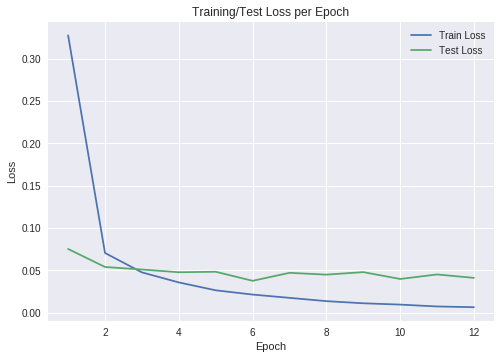

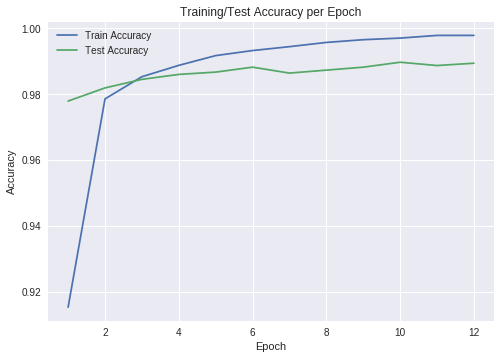

In [44]:
#Negative # Changing pooling to Average Pooling
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tensorflow.examples.tutorials.mnist import input_data
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras import optimizers
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = 255 - x_train
x_test = 255 - x_test

print('Changing pooling to Average Pooling')

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = keras.Sequential()

model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(AveragePooling2D())

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())

model.add(Flatten())

model.add(Dense(units=120, activation='relu'))

model.add(Dense(units=84, activation='relu'))

model.add(Dense(units=10, activation = 'softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
scores = model.evaluate(x_test, y_test, verbose=0)


print('LeNet 5 Training Error: %.4f%%' % (100-history.history['acc'][epochs-1]*100))
print('LeNet 5 Training Loss: %.4f%%' % (history.history['loss'][epochs-1]*100))
print('LeNet 5 Training Accuracy: %.4f%%' % (history.history['acc'][epochs-1]*100))

print('LeNet 5 Test Error: %.4f%%' % (100-scores[1]*100))
print('LeNet 5 Test Loss: %.4f%%' % (scores[0]*100))
print('LeNet 5 Test Accuracy: %.4f%%' % (scores[1]*100))


def PlotHistory(train_value, test_value, value_is_loss_or_acc):
    f, ax = plt.subplots()
    ax.plot([None] + train_value)
    ax.plot([None] + test_value)
    ax.legend(['Train ' + value_is_loss_or_acc, 'Test ' + value_is_loss_or_acc], loc = 'best') 
    ax.set_title('Training/Test ' + value_is_loss_or_acc + ' per Epoch')
    ax.set_xlabel('Epoch')
    ax.set_ylabel(value_is_loss_or_acc)  
    
PlotHistory(history.history['loss'], history.history['val_loss'], 'Loss')
PlotHistory(history.history['acc'], history.history['val_acc'], 'Accuracy')

Changing pooling to Average Pooling
x_train shape: (120000, 28, 28, 1)
120000 train samples
20000 test samples
Train on 120000 samples, validate on 20000 samples
Epoch 1/12
120000/120000 [==============================] - 47s 391us/step - loss: 0.3389 - acc: 0.8907 - val_loss: 0.1069 - val_acc: 0.9676
Epoch 2/12
120000/120000 [==============================] - 45s 373us/step - loss: 0.0881 - acc: 0.9733 - val_loss: 0.0709 - val_acc: 0.9773
Epoch 3/12
120000/120000 [==============================] - 45s 374us/step - loss: 0.0668 - acc: 0.9791 - val_loss: 0.0643 - val_acc: 0.9798
Epoch 4/12
120000/120000 [==============================] - 45s 374us/step - loss: 0.0536 - acc: 0.9835 - val_loss: 0.0663 - val_acc: 0.9788
Epoch 5/12
120000/120000 [==============================] - 45s 374us/step - loss: 0.0454 - acc: 0.9858 - val_loss: 0.0557 - val_acc: 0.9830
Epoch 6/12
120000/120000 [==============================] - 45s 376us/step - loss: 0.0391 - acc: 0.9880 - val_loss: 0.0464 - val_acc:

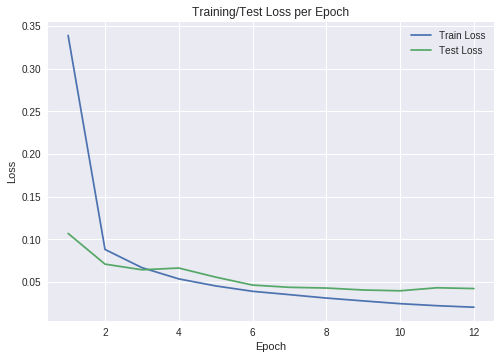

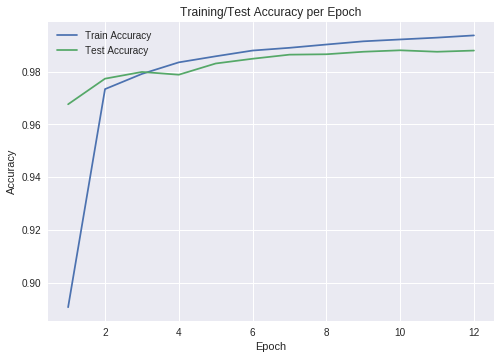

In [43]:
#Positive and Negative # Changing pooling to Average Pooling #Normalization
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tensorflow.examples.tutorials.mnist import input_data
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras import optimizers
from keras import backend as K
from sklearn.utils import shuffle

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train_p = x_train.astype('float32')
x_test_p = x_test.astype('float32')

x_train_n=255-x_train_p
x_test_n=255-x_test_p

x_train=np.vstack((x_train_p , x_train_n))
x_test=np.vstack((x_test_p , x_test_n))

x_train /= 255
x_test /= 255

print('Changing pooling to Average Pooling')

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train_p = keras.utils.to_categorical(y_train, num_classes)
y_test_p = keras.utils.to_categorical(y_test, num_classes)

y_train_n=y_train_p
y_test_n=y_test_p

y_train=np.vstack((y_train_p , y_train_n))
y_test=np.vstack((y_test_p , y_test_n))

x_train, y_train = shuffle(x_train, y_train)
x_test, y_test = shuffle(x_test, y_test)

model = keras.Sequential()

model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(AveragePooling2D())

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())

model.add(Flatten())

model.add(Dense(units=120, activation='relu'))

model.add(Dense(units=84, activation='relu'))

model.add(Dense(units=10, activation = 'softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
scores = model.evaluate(x_test, y_test, verbose=0)


print('LeNet 5 Training Error: %.4f%%' % (100-history.history['acc'][epochs-1]*100))
print('LeNet 5 Training Loss: %.4f%%' % (history.history['loss'][epochs-1]*100))
print('LeNet 5 Training Accuracy: %.4f%%' % (history.history['acc'][epochs-1]*100))

print('LeNet 5 Test Error: %.4f%%' % (100-scores[1]*100))
print('LeNet 5 Test Loss: %.4f%%' % (scores[0]*100))
print('LeNet 5 Test Accuracy: %.4f%%' % (scores[1]*100))


def PlotHistory(train_value, test_value, value_is_loss_or_acc):
    f, ax = plt.subplots()
    ax.plot([None] + train_value)
    ax.plot([None] + test_value)
    ax.legend(['Train ' + value_is_loss_or_acc, 'Test ' + value_is_loss_or_acc], loc = 'best') 
    ax.set_title('Training/Test ' + value_is_loss_or_acc + ' per Epoch')
    ax.set_xlabel('Epoch')
    ax.set_ylabel(value_is_loss_or_acc)  
    
PlotHistory(history.history['loss'], history.history['val_loss'], 'Loss')
PlotHistory(history.history['acc'], history.history['val_acc'], 'Accuracy')